In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
distribution = norm(scale=.2)

In [3]:
epsilons = distribution.rvs(size=500)

In [11]:
X = np.linspace(-10, 10, 500)
Y = X/2 + 1 + epsilons

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

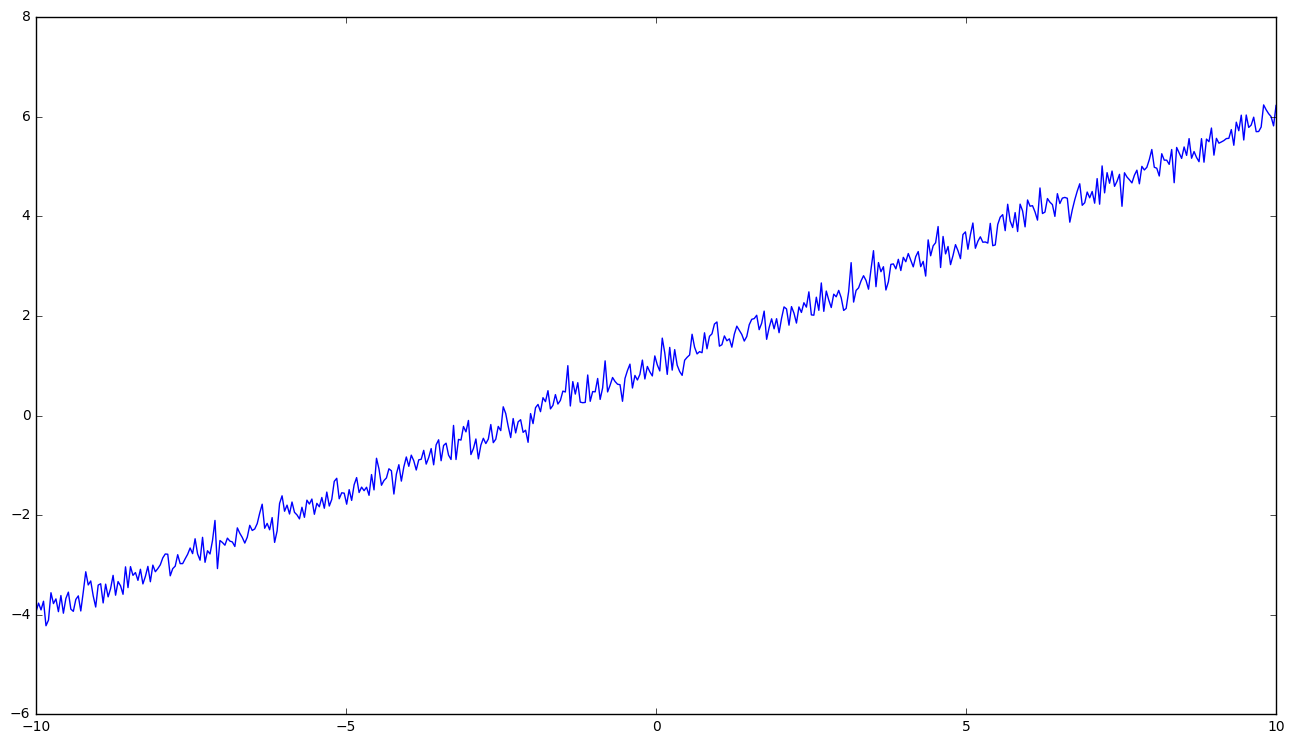

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(X, Y)

In [21]:
from scipy.optimize import minimize

In [57]:
def f(X, ws):
    return ws[0] * X + ws[1]

def MSE(X, Y, ws):
    return np.square(f(X, ws) - Y).sum() / X.shape[0]

def MAE(X, Y, ws):
    return np.abs(f(X, ws) - Y).sum() / X.shape[0]

In [51]:
wrapped_MSE = lambda ws: MSE(X, Y, ws)
ws = minimize(wrapped_MSE, np.array([.5, 1]))['x']
ws

array([ 0.50130547,  0.99580101])

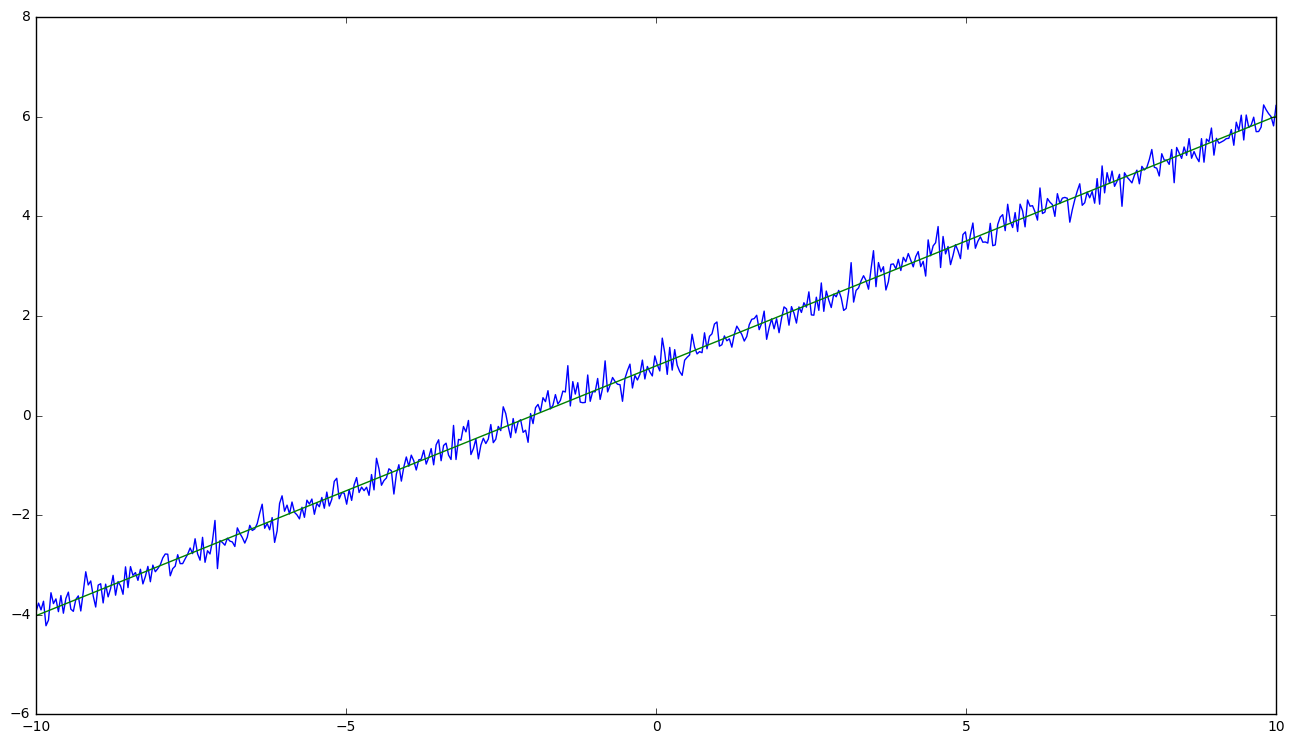

In [52]:
plt.figure(figsize=(16, 9))
plt.plot(X, Y)
x_0, x_1 = X.min(), X.max()
plt.plot([x_0, x_1], [f(x_0, ws), f(x_1, ws)])

In [65]:
X_additional = np.linspace(-10, 10, 75)
Y_additional = -1 + distribution.rvs(size=75)

XS = np.append(X, X_additional)
YS = np.append(Y, Y_additional)

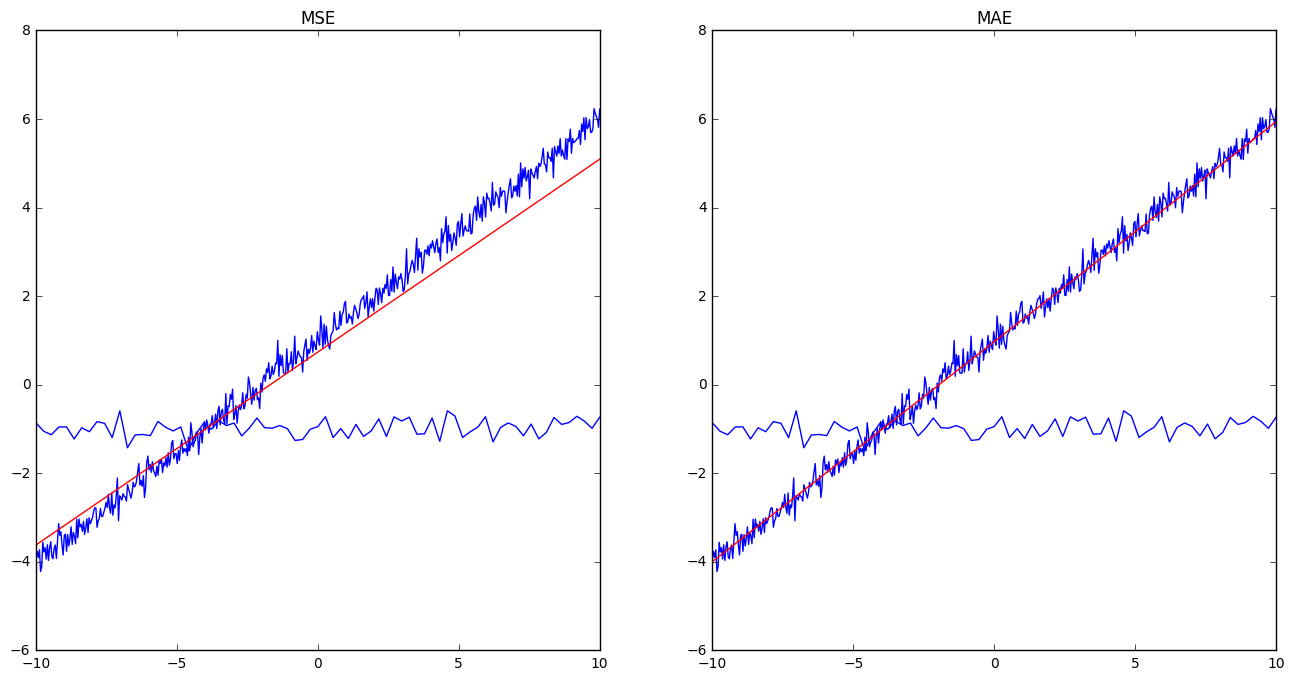

In [80]:
wrapped_MSE = lambda ws: MSE(XS, YS, ws)
wrapped_MAE = lambda ws: MAE(XS, YS, ws)

plt.figure(figsize=(16, 8))

for i, err_f in enumerate([wrapped_MSE, wrapped_MAE]):
    ws = minimize(err_f, np.array([.5, 1]))['x']
    plt.subplot(1, 2, i + 1)
    plt.plot(X, Y, 'b')
    plt.plot(X_additional, Y_additional)
    x_0, x_1 = XS.min(), XS.max()
    y_0, y_1 = f(x_0, ws), f(x_1, ws)
    plt.plot([x_0, x_1], [y_0, y_1], 'r')
    plt.title(['MSE', 'MAE'][i])

#### Модель MAE более устойчива к выбросам по сравнению с MSE